<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Mike_Smith_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#mean,variance, std

In [0]:
import math
import numpy as np 
import pandas as pd

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2698]

In [0]:
#////////////////////////////mean//////////////////////////////////

In [5]:
total = sum(sales)
mean_sales = total / len(sales)
mean_sales

3054.0

In [6]:
#///////////////////////////variance///////////////////////////////
def subtract_mean(point):
  return point-mean_sales
#convert to lambda for efficiency
lambda x: x-mean_sales
#use 'map to apply function to list (distance of each point from mean)
distances = list(map(subtract_mean, sales))
distances


[451.0, -654.0, -27.0, -256.0, 646.0, 196.0, -356.0]

In [7]:
sq_distances = list(map(lambda x: x**2, distances))
sq_distances

[203401.0, 427716.0, 729.0, 65536.0, 417316.0, 38416.0, 126736.0]

In [8]:
#how long is our list?
length_samp = len(sq_distances)-1
length_pop = len(sq_distances)
#calculate variance
variance_sales = sum(sq_distances)/length_samp
#round to 2 digits
print('{:.2f}'.format(variance_sales))

#population variance
variance_sales = sum(sq_distances)/length_pop
print('{:.2f}'.format(variance_sales))


213308.33
182835.71


In [0]:
#Instructor showed a prior lecture random array plotted example for variance, not the array he created, so I did not plot this time.
# plt.scatter(variance_sales)
# plt.xlim(0,100)
# plt.title("Plot 1")
# plt.show()

# plt.scatter(variance_sales.v2, variance_df.zeros)
# plt.xlim(0,100)
# plt.title("Plot 2")
# plt.show()

In [0]:
#////////////////////////////////standard deviation/////////////////////////////////////

In [11]:
print(math.sqrt(variance_sales))
print('{:.4f}'.format(np.sqrt(variance_sales)))

427.5929305843518
427.5929


In [12]:
#///////////////////////////////////Now the shortcuts///////////////////////////////
#check using numpy
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3054.0
182835.7142857143
427.5929305843518


In [13]:
#checking using pandas
df = pd.DataFrame({'sales':sales})
df['sales'].mean()

3054.0

In [14]:
#for population
print(df['sales'].var(ddof = 0))
print(df['sales'].std(ddof = 0))

182835.7142857143
427.5929305843518


In [15]:
#for sample
print(df['sales'].var(ddof = 1))
print(df['sales'].std(ddof = 1))

213308.33333333334
461.85315126491594


## 1.2 Find the covariance between last week's sales numbers and the number of 
customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
#covariance (addition to variance)
#find covariance with sales and cust

In [17]:
cust = [127, 80, 105, 92, 120, 115, 93]
np.cov(sales, cust)

array([[213308.33333333,   7587.        ],
       [  7587.        ,    290.95238095]])

In [18]:
df['cust'] = pd.Series(cust)
df.cov().values[0][1]

7587.0

In [0]:
#large positive covariance indicates strong relationship
#very differe scales may not cov

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#/////////////////////correlation coefficient///////////////////////////

In [0]:
#-1,+1, 0 no linear relationship
#corr coeff is always better vs cov

In [22]:
std_s = df['sales'].std(ddof = 1)
std_c = df['cust'].std(ddof = 1)
print(std_s, '\n', std_c)

461.85315126491594 
 17.057326313123664


In [23]:
cov_sc = df['sales'].cov(df['cust'])
print('{:.2f}'.format(cov_sc)) 

7587.00


In [0]:
denom = std_s * std_c

In [25]:
#so as sales went up cust went up
corr_sc = cov_sc / denom
print('{:.2f}'.format(corr_sc)) 

0.96


In [26]:
#check work using pandas shortcut
df.corr()

,sales,cust
sales,1.000000,0.963064
cust,0.963064,1.000000


In [27]:
#check one column only
df['sales'].corr(df['cust'])

0.963064146748385

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
#source
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [29]:
#read into pandas
titanic = pd.read_csv(url)
titanic.head(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [30]:
#covariance matrix
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [31]:
#correlation matrix (always better measure vs cov)
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [32]:
# A synonym for orthogonal = perpendicular = 0 dot product
#1 random and 1 fixed vector (you tricky teacher you ;), thanks Austin.)
v = np.array([15,20,25])
x = np.random.randint(low = 1, high = 100, size = 3)
print(v, '/n', x)

[15 20 25] /n [21 50 70]


In [33]:
#An orthogonal vector
vector_1 = np.array([2,2])
vector_2 = np.array([1,-1])
print(vector_1, '/n', vector_2)

[2 2] /n [ 1 -1]


In [34]:
#which is longer? vector v
for vect in [v,x]:
  norm = np.linalg.norm(vect)
  print(norm)

35.35533905932738
88.54942122905152


In [35]:
#which is longer? vector_1
for vect in [vector_1,vector_2]:
  norm = np.linalg.norm(vect)
  print(norm)

2.8284271247461903
1.4142135623730951


In [36]:
#what's the dot product of v and x using array broadcasting?
(v[0]*x[0]) + (v[1]*x[1]) + (v[2]*x[2])

3065

In [37]:
(vector_1[0]*x[0]) + (vector_2[1]*x[1])

-8

In [38]:
#numpy shortcut! 
np.dot(x,v)

3065

In [39]:
np.dot(vector_1,vector_2)

0

In [40]:
#another shortcut!
x.dot(v)

3065

In [41]:
vector_1.dot(vector_2)

0

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#choose your vectors
vector_1 = np.array([2,2])
vector_2 = np.array([1,-1])

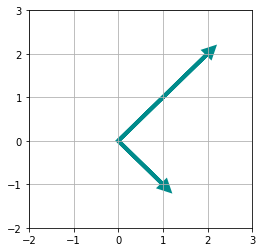

In [44]:
#set up the graph so x,y axis are symmetrical
fig, ax = plt.subplots(figsize=(4,4)) #physical size
ax.grid()
plt.xlim(-2,3) #grid
plt.ylim(-2,3)

#plot vectors
for vect in [vector_1, vector_2]:
  plt.arrow(0,0, vect[0], vect[1], head_width = .2, head_length = .2, linewidth = 4, color = 'darkcyan')


In [45]:
#If the dot products !=0 the vectors aren't orthogonal.
np.dot(vector_1, vector_2)

0

In [46]:
#dot product test
a = np.array([-7, 4])
b = np.array([-5, 3])
np.dot(a,b)

47

In [47]:
#any # of dimensions
#make them up at random
x = np.random.randint(low = 1, high = 100, size = 19)
y = np.random.randint(low = 1, high = 100, size = 19)
print('rng array x:', x)
print('rng array y:', y)

print('rng array dot product:', np.dot(x,y))

#make them up at random
x = np.array([-7, 4, 9, 12, 22, 25 ])
y = np.array([-5, 3, 99, 69, 55, 75])
print('fixed array x:', x)
print('fixed array y:', y)
print('fixed array dot product:', np.dot(a,b))

rng array x: [12 86 56  1 17 18 60 87 64 58 60 96 78 74 98 19 61 58 63]
rng array y: [91 79 79 42 23 81 73 41 21 13 64 72 52 65 79  3  8 30 98]
rng array dot product: 60065
fixed array x: [-7  4  9 12 22 25]
fixed array y: [-5  3 99 69 55 75]
fixed array dot product: 47


In [0]:
#If the dot product !=0 then it's not orthogonal.
#n_elements must equal same for each vector

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [49]:
#np.dot says this vector isn't orthogonal, !=0
a = np.array([-5,3,7])
b = ([6,-8,2])
np.dot(a,b)

-40

In [50]:
#for any vector generate another which is orthogonal
k = np.random.randn(3)
x = np.random.randn(3)
print(k,x) 
np.dot(k,x)

[-1.33658674 -0.12714045 -0.41358218] [-1.38895487 -0.40209693 -0.84694982]


2.2578648013454727

In [51]:
#the 2 aren't orthogonal, make x orthogonal to k
x -= x.dot(k) * k/np.linalg.norm(k)**2
print('{:.4f}'.format(np.dot(x,k)))
print(x)

0.0000
[ 0.1400841  -0.2566498  -0.37381684]


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [52]:
#make a vector and find how long it is.
f = np.array([4,12,11,9,2])
norm_f = np.linalg.norm(f)
norm_f

19.131126469708992

In [53]:
#make a unit vector
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [54]:
# and find how long it is
#0.99999?
f_hat_norm = np.linalg.norm(f_hat)
print(f_hat_norm)

#round to 1
f_hat_norm = round(np.linalg.norm(f_hat))
f_hat_norm


0.9999999999999999


1.0

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [57]:
#linearly dependent
vector1 = np.array([-.8, 1.3])
vector2 = np.multiply(vector1, 2)
print(vector1, '\n', vector2)

[-0.8  1.3] 
 [-1.6  2.6]


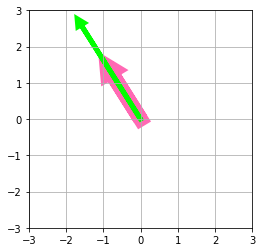

In [65]:
#Plot the vectors
fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
#graph the vectors
for myvect, mycolor, mywidth in [(vector1, 'hotpink', 15), (vector2, 'lime', 5)]:
  plt.arrow(0,0, myvect[0], myvect[1], head_width=.2, head_length=.2, linewidth=mywidth, color=mycolor)

[ 0 -1] 
 [ 1 -3]


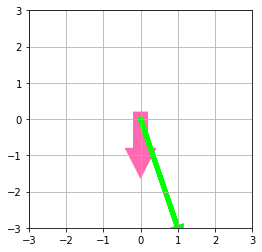

In [79]:
#linearly independent, not orthogonal
vector1 = np.random.randint(low=-3, high=3, size=2)
vector2 = np.random.randint(low=-3, high=3, size=2)
print(vector1, '\n', vector2)
#set up the grid
fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
#graph the vectors 
for myvect, mycolor, mywidth in [(vector1, 'hotpink', 15), (vector2, 'lime', 5)]:
  plt.arrow(0,0, myvect[0], myvect[1], head_width=.2, head_length=.2, linewidth=mywidth, color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

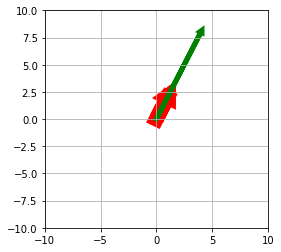

In [82]:
#The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear).
#The set of all possible vectors on the same line as the graph below.

#span = all possible linear combinations = 
g = np.array([1,2])
h = np.array([4,8])
#plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-10,10)
plt.ylim(-10,10)
#graph
for myvect, mycolor, mywidth in [(g, 'red', 15), (h, 'green', 5)]:
  plt.arrow(0,0, myvect[0], myvect[1], head_width=.2, head_length=.2, linewidth=mywidth, color=mycolor)

In [0]:
g,h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

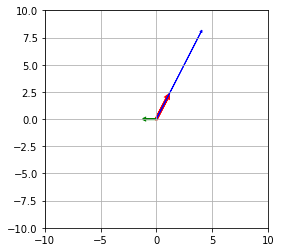

In [90]:
#The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear).
#Since vector l and n are colinear their span is limited to that vector line. But the span for vector m vs l,m is infinite for the 2D plane.
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
#plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-10,10)
plt.ylim(-10,10)
#graph
for myvect, mycolor, mywidth in [(l, 'red', 3), (m, 'green', 2), (n, 'blue', 1)]:
  plt.arrow(0,0, myvect[0], myvect[1],  head_width=.2, head_length=.2, linewidth=mywidth, color=mycolor)

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



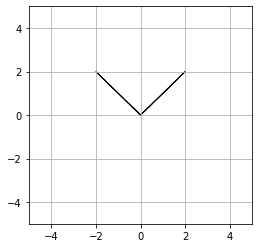

In [91]:
#find basis vectors in 2d
#basis must be linearly independent and span the vector space (they create the dimensional space)
vector_1 = [-2,2]
vector_2 = [2,2]

#plot the scaled vectors
fig, ax = plt.subplots(figsize = (4,4))
ax.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)

#graph it
plt.arrow(0,0, vector_1[0], vector_1[1])
plt.arrow(0,0, vector_2[0], vector_2[1])

#orthogonal basis, linearly independent, span vector space, are orthogonal
#orthonormal basis, above and must have unit length = 1

## 6.2 What does it mean to form a basis?

In [0]:
#basis must be linearly independent and span the vector space (they create the dimensional space)
#orthogonal basis, linearly independent, span vector space, are orthogonal
#orthonormal basis, above and must have unit length = 1

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [92]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
pd.DataFrame(P)

,0,1,2
0,1,2,3
1,-1,0,7
2,4,8,2


In [93]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

In [0]:
#The dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

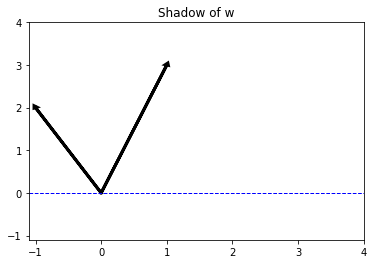

In [95]:
#Axis Bounds
plt.xlim(-1.1,4)
plt.ylim(-1.1,4)

#Original Vector
v = [1,3]
w = [-1,2]

#get vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, proj[0], proj[1], linewidth=3, head_width=.5, head_length=.05)
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=.05)
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=.05)

plt.title("Shadow of w")
plt.show()


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()